In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
#cancer=pd.DataFrame(data.data, columns=data.feature_names)

In [8]:
#cancer["target"]=data.target

In [9]:
data.data


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
#change  the data into data frame 
cancer_data=pd.DataFrame(data.data)

In [12]:
cancer_data.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.131900,0.055980,0.1885,0.06125,...,15.89,30.36,116.20,799.6,0.1446,0.42380,0.518600,0.14470,0.3591,0.10140
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.79170,1.170000,0.23560,0.4089,0.14090


In [13]:
cancer_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
cancer_target=pd.DataFrame(data.target)
cancer_target.head(3)

,0
0,0
1,0
2,0


In [15]:
# this is in numpy array format  which is 1D
#it has notbeen dataframes 

cancer_data.shape

(569, 30)

In [16]:
#it has to be  reshaped to 2D
cancer_target.shape

(569, 1)

In [17]:
#fix  x and y data (input and output)
x=data.data
y=data.target


In [18]:
x.shape


(569, 30)

In [19]:
y.shape

(569,)

In [20]:
y=y.reshape(-1,1)
y.shape

(569, 1)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)


In [22]:
x_train.shape

(398, 30)

In [23]:
y_train.shape

(398, 1)

In [24]:
x_test.shape

(171, 30)

In [25]:
y_test.shape

(171, 1)

In [26]:
lg=LogisticRegression()

In [27]:
lg.fit(x_train,y_train)

LogisticRegression()

In [28]:
pred=lg.predict(x_test)
pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [29]:
print ("Accuracy score :", accuracy_score(y_test,pred))

Accuracy score : 0.9473684210526315


In [30]:
print (confusion_matrix(y_test,pred))

[[ 53   8]
 [  1 109]]


In [31]:
print(classification_report(y_test,pred))
# support is the actual data which is to be compared with the predicted data 

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        61
           1       0.93      0.99      0.96       110

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



# LS 8.22

# AUC ROC curve


Area under the curve - receiver operatingcharacteristics 

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [33]:
pred_y_proba=lg.predict_proba(x_test)[:,1]

In [34]:
pred_y_proba

array([6.20100322e-01, 6.89267587e-06, 3.47583118e-10, 9.99767588e-01,
       9.99823642e-01, 9.99538717e-01, 9.81473295e-01, 9.99439523e-01,
       9.93100627e-01, 9.98038244e-01, 9.99592304e-01, 4.49018929e-03,
       9.95468316e-01, 9.95244079e-01, 9.98955043e-01, 8.43928163e-09,
       9.39109885e-01, 9.70531580e-01, 9.77783763e-01, 9.99165009e-01,
       9.97285619e-01, 9.99958517e-01, 9.89703289e-01, 7.80426340e-01,
       2.62889171e-04, 9.94185740e-01, 9.90589315e-01, 9.93748618e-01,
       5.31735967e-03, 9.81371394e-01, 9.58420064e-01, 9.99126706e-01,
       9.82723065e-01, 1.81691931e-09, 9.99453342e-01, 9.99849715e-01,
       9.99817324e-01, 9.99918990e-01, 2.54358729e-01, 1.78980773e-03,
       9.17371235e-04, 9.95044501e-01, 9.99439491e-01, 1.12240362e-10,
       9.99419558e-01, 9.99305494e-01, 9.97999320e-01, 2.03980421e-04,
       9.66751808e-01, 9.99520123e-01, 9.82145858e-01, 9.98106172e-01,
       2.52128370e-03, 9.98433918e-01, 9.77217489e-01, 6.41406251e-04,
      

In [35]:
# constant synax #
fpr,tpr,thresholds=roc_curve(y_test, pred_y_proba)

In [36]:
fpr

array([0.        , 0.        , 0.        , 0.01639344, 0.01639344,
       0.03278689, 0.03278689, 0.04918033, 0.04918033, 0.06557377,
       0.06557377, 0.13114754, 0.13114754, 0.21311475, 0.21311475,
       1.        ])

In [37]:
tpr

array([0.        , 0.00909091, 0.7       , 0.7       , 0.88181818,
       0.88181818, 0.89090909, 0.89090909, 0.96363636, 0.96363636,
       0.97272727, 0.97272727, 0.99090909, 0.99090909, 1.        ,
       1.        ])

In [38]:
thresholds

array([1.99997175e+00, 9.99971749e-01, 9.89255950e-01, 9.88357506e-01,
       9.65037464e-01, 9.58420064e-01, 9.45278044e-01, 9.39109885e-01,
       8.47139940e-01, 8.07525987e-01, 7.80426340e-01, 6.56972227e-01,
       5.90794514e-01, 2.10787781e-02, 2.00931804e-02, 2.26589851e-28])

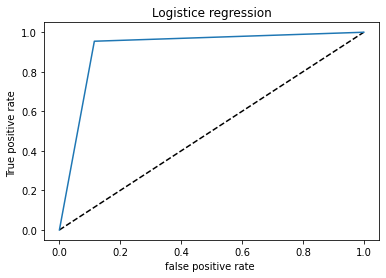

In [48]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr ,tpr,label=" Logistic regrssion ")
plt.xlabel("false positive rate ")
plt.ylabel( "True positive rate ")
plt.title( "Logistice regression" )
plt.show()

In [40]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [41]:
auc_score

0.9298807749627422

the accuracy score is the score that denotes how the  model is working  . 
like above  here the model is 92 % is accurate 


# Use of decision tree 

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print (accuracy_score(y_test,p))

0.9298245614035088


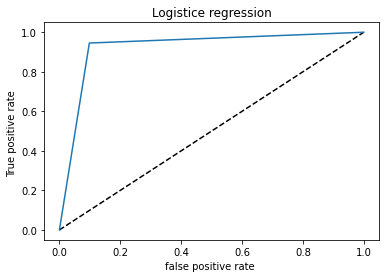

0.9235469448584203

In [50]:
#plotting decision tree curve 
pred_y_proba=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_y_proba)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr ,tpr,label=" Logistic regrssion ")
plt.xlabel("false positive rate ")
plt.ylabel( "True positive rate ")
plt.title( "Logistice regression" )
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

In [51]:
#testing various models in function 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 


In [52]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
model=[lg,gnb,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("accuracy score of ",m ,"is :")
    print(accuracy_score(y_test,predm))
    print(classification_report (y_test,predm))
    print("\n")
    

accuracy score of  LogisticRegression() is :
0.9473684210526315
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        61
           1       0.93      0.99      0.96       110

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



accuracy score of  GaussianNB() is :
0.935672514619883
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        61
           1       0.92      0.98      0.95       110

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



accuracy score of  SVC() is :
0.9122807017543859
              precision    recall  f1-score   support

           0       0.98      0.77      0.86        61
           1       0.89      0.99      0.94       110

    accura